In [65]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries

!pip install matplotlib deap

In [66]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator,tools, algorithms

In [67]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10 # Define the number of locations (eg 10)

locations = [(random.randint(0,100),random.randint(0,100)) for i in range(num_locations)]
            # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = [50,50] # Define the coordinates for the depot

num_vehicles = 3 # Define the number of vehicles - (eg 3)
print(locations)

[(87, 86), (30, 0), (41, 96), (54, 70), (17, 93), (6, 71), (6, 65), (22, 2), (92, 60), (82, 64)]


In [68]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness,weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [69]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [70]:
#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [71]:
# TODO: Task 7 - Configure the genetic operators
from deap.tools import mutShuffleIndexes
toolbox.register("mate",tools.cxPartialyMatched) # Choose and configure a crossover method)
toolbox.register("mutate",mutShuffleIndexes,indpb=0.2)# Choose and configure a mutation method)
toolbox.register("select",tools.selRoulette) # Choose and configure a selection method)
toolbox.register("evaluate",evalVRP)


In [72]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	373.846	1.02466
1  	235   	367.887	1.02466
2  	221   	368.616	1.26146
3  	230   	371.713	2.43327
4  	236   	371.109	2.66076
5  	240   	374.257	2.66076
6  	223   	371.709	0.775252
7  	222   	370.407	2.04668 
8  	233   	372.974	3.09973 
9  	236   	375.035	2.28163 
10 	245   	376.462	2.90596 
11 	232   	373.691	2.90596 
12 	251   	376.298	1.6609  
13 	235   	377.347	1.6609  
14 	232   	373.228	2.2166  
15 	216   	377.599	4.51866 
16 	236   	375.016	1.65389 
17 	216   	376.356	3.40051 
18 	225   	382.354	3.13464 
19 	210   	376.859	3.81584 
20 	232   	378.968	1.05666 
21 	223   	381.142	2.32448 
22 	234   	378.384	1.5272  
23 	217   	372.302	3.21602 
24 	229   	372.968	1.56405 
25 	213   	375.379	2.91697 
26 	225   	370.999	0.92596 
27 	230   	370.454	0.92596 
28 	237   	369.319	0.283237
29 	229   	375.486	1.92103 
30 	244   	376.735	2.58981 


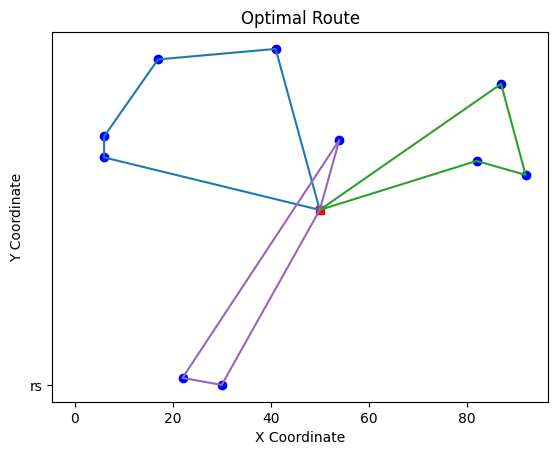

In [73]:
# def main():
#   random.seed(42)
#   pop=toolbox.population(n=100)
#   hof=tools.HallOfFame(1)
#   stats=tools.Statistics(lambda ind:ind.fitness.values)
#   stats.register("avg",np.mean)
#   stats.register("min",np.min)
#   algorithms.eaSimple(pop,toolbox,0.7,0.2,30,stats=stats,halloffame=hof)
#   plot_routes(hof[0])
#   return pop,stats,hof
# if __name__=="__main__":
#   main()

# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
  main()